In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
vendor = pd.read_csv('market_vendors.csv')
vendor.head()

,vendorID,theme,homeState,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
0,1,Artisan Chocolates,Maine,3,9,57.291961,118,0,217.93
1,2,Local Artists,Vermont,1,2,39.404898,105,1,209.51
2,3,Fortune Teller,New Hampshire,5,4,47.175958,94,0,200.68
3,4,Fried Dough and Pizza,Maine,8,0,58.192568,118,0,251.40
4,5,craft beer,New Hampshire,7,6,56.657908,102,0,168.76


In [268]:
vendor.homeState.unique()

array(['Maine', 'Vermont', 'New Hampshire', 'Quebec', 'Connecticut',
       'Massachusetts', 'Ontario', '6', '5', '2', '7', '4'], dtype=object)

* I found that there are row names as numbers in homeState, I decided to change them to "other", since, for rows like that, the person responsible for this dataset may tend to record other states and mistakenly put the numbers on. 

In [272]:
# change the rows of which named as numbers in homeState as 'others'
vendor['homeState'] = vendor['homeState'].replace(['6', '5', '2', '7', '4'], 'Others')

In [270]:
vendor.theme.unique()

array(['Artisan Chocolates', 'Local Artists', 'Fortune Teller',
       'Fried Dough and Pizza', 'craft beer', 'Homemade Gifts',
       'Video Game/eSports', 'Games Of Chance', 'Ice Cold Lemonade',
       'Canadian Snacks', 'Maine Tourism Promotion',
       'Design Your Own T-Shirt', 'Local Politician',
       'Specialty Ice Cream', '8', '3', '4', '7', '5', '9'], dtype=object)

* Same for "theme".

In [271]:
vendor['theme'] = vendor['theme'].replace(['8', '3', '4', '7', '5', '9'], 'Others')

## Which group gets more complaints? The passholders or the non-passholders?

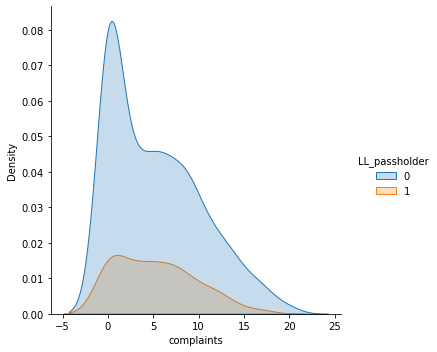

In [308]:
# which group gets more complaints?
sns.displot(x="complaints", hue="LL_passholder", kind='kde', fill=True, data=vendor);

* Simply by the numbers, we cannot tell which group gets more complaints since non-passholders are more than passholders. But we can see the density as a reference(for passholders, complaints = 0 has the most dense).

In [273]:
grouped_cp = vendor.groupby(['LL_passholder']).agg({
    'complaints': 'mean'
}).sort_values('complaints')
grouped_cp

,complaints
LL_passholder,
0,5.233393
1,5.251748


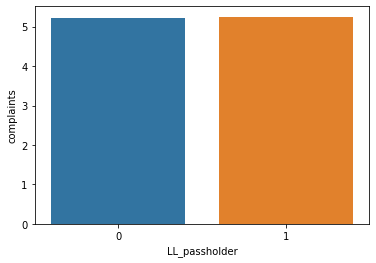

In [275]:
sns.barplot(y = 'complaints', x = grouped_cp.index, ci = None, data = grouped_cp);

In [276]:
vendor.LL_passholder.value_counts()

0    557
1    143
Name: LL_passholder, dtype: int64

* Looks like these two groups have the almost same number of complaints, but the number of passholders is different(passholders are 143, non-passholders are 557). Therefore, it looks like we got something to worry about. Proportionally, the prospective vendors, as Lobster Land passholders, received more complaints against those vendors during previous appearances either at carnivals or at carnival-type events. In addition, passholders, are the long-term visitors to Lobster Land. We may want to find out what is the reason for that, why would the passholders get more complaints. Roughly guessing, it may be related to since passholders are really familiar with Lobster Land, they didn't try too hard to please the customers, which cause their complaints. For passholders, we may need to give them some tips to deal with the situation well.

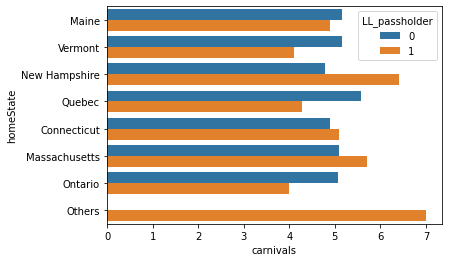

In [125]:
sns.barplot(x = 'carnivals', y = 'homeState', hue = 'LL_passholder', ci = None, data = vendor);

* According to the plot, we can see that in New Hampshire, there were more vendors appeared in carnivals for passholders. And for Ontario, there were the least number of vendors that appeared in carnivals for passholders. As for non-passholders, Maine has the largest number and New Hampshire has the lowest.

In [277]:
vendor.describe()

,vendorID,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,345.375714,5.135714,5.237143,47.501858,110.152857,0.204286,216.543357
std,204.173508,2.202258,4.914525,14.172002,15.903799,0.403467,41.561560
min,1.000000,0.000000,0.000000,3.069903,1.000000,0.000000,4.000000
25%,167.750000,4.000000,0.000000,39.596198,103.000000,0.000000,193.810000
50%,346.500000,5.000000,4.500000,47.955097,110.500000,0.000000,217.490000
75%,521.250000,7.000000,9.000000,57.336190,119.000000,0.000000,242.502500
max,700.000000,13.000000,20.000000,91.567936,147.000000,1.000000,322.570000


In [278]:
# To see which theme has most counts
vendor.theme.value_counts()

Artisan Chocolates         113
Homemade Gifts             104
Games Of Chance             85
Fried Dough and Pizza       75
Local Artists               74
Canadian Snacks             74
Ice Cold Lemonade           42
Specialty Ice Cream         30
Video Game/eSports          23
craft beer                  19
Design Your Own T-Shirt     19
Maine Tourism Promotion     15
Local Politician            10
Fortune Teller               9
Others                       8
Name: theme, dtype: int64

* As we can see, Artisan Chocolates has the most counts, which means it is the most popular theme. And the Fortune Teller has the least counts(other than the "others").

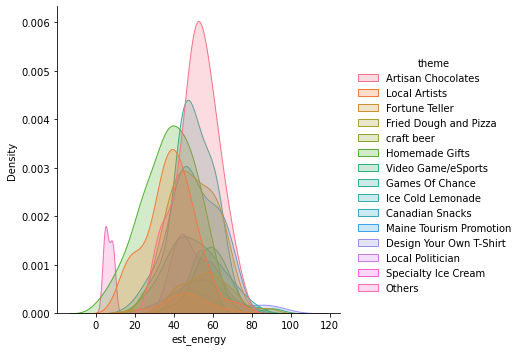

In [309]:
# which theme comsume more energy?
sns.displot(x="est_energy", hue="theme", kind='kde', fill=True, data=vendor);

* For estimated energy usage, Artisan Chocolates seems to have the largest median, since this theme has the most counts of all themes and is not grouped yet. So we can only take it as a reference for our further visualization.

In [297]:
# Groupby theme, to see if complaints and est_energy are related 
grouped_ce = vendor.groupby(['theme']).agg({
    'complaints': 'mean',
    'est_energy': 'mean'
})
grouped_ce

,complaints,est_energy
theme,,
Artisan Chocolates,5.265487,52.164656
Canadian Snacks,4.972973,50.085684
Design Your Own T-Shirt,4.631579,56.415234
Fortune Teller,7.444444,45.398320
Fried Dough and Pizza,4.800000,50.318975
Games Of Chance,4.317647,50.341382
Homemade Gifts,6.269231,37.462214
Ice Cold Lemonade,5.547619,50.196666
Local Artists,5.270270,38.371918


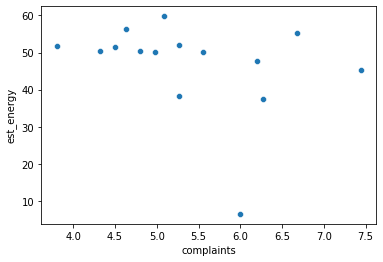

In [296]:
sns.scatterplot(x='complaints', y='est_energy', data=grouped_ce);

* As far as I am concerned, those people who are environmentalists might not like the energy-consuming theme, but from this plot, the number of complaints and estimated energy usage do not necessarily have a causal relationship.

In [299]:
# Groupby theme, to see if est_hourly_gross and est_energy is related 
grouped_ee = vendor.groupby(['theme']).agg({
    'est_energy': 'mean',
    'est_hourly_gross':'mean'
}).sort_values('est_energy')

In [304]:
grouped_ee

,est_energy,est_hourly_gross
theme,,
Others,6.500000,6.625000
Homemade Gifts,37.462214,215.885385
Local Artists,38.371918,224.376216
Fortune Teller,45.398320,207.072222
Local Politician,47.698522,222.541000
Canadian Snacks,50.085684,221.436892
Ice Cold Lemonade,50.196666,218.952381
Fried Dough and Pizza,50.318975,219.167333
Games Of Chance,50.341382,222.085176


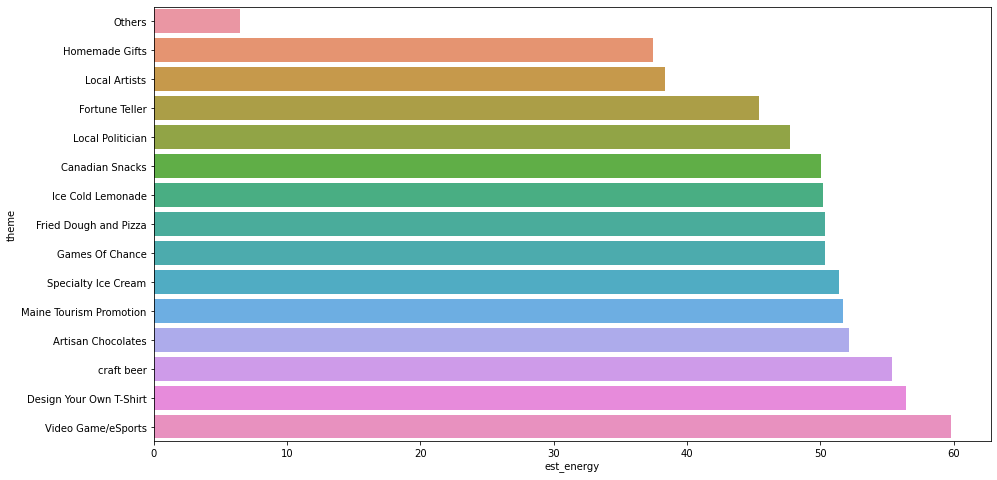

In [301]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y=grouped_CE.index, x="est_energy", orient='h', data=grouped_ee);

* As we can see, the theme for Video Game/eSports has the highest estimated energy usage, which makes sense because it requires power to do that; and the homemade gifts have the lowest estimated energy usage, which also makes sense since it is made manually.

In [314]:
grouped_ee1 = vendor.groupby(['theme']).agg({
    'est_energy': 'mean',
    'est_hourly_gross':'mean'
}).sort_values('est_hourly_gross')

In [306]:
grouped_ee1

,est_energy,est_hourly_gross
theme,,
Others,6.500000,6.625000
Fortune Teller,45.398320,207.072222
Artisan Chocolates,52.164656,214.720354
Maine Tourism Promotion,51.709750,215.484000
Homemade Gifts,37.462214,215.885385
Specialty Ice Cream,51.397807,217.727333
Video Game/eSports,59.781322,217.996522
Ice Cold Lemonade,50.196666,218.952381
Fried Dough and Pizza,50.318975,219.167333


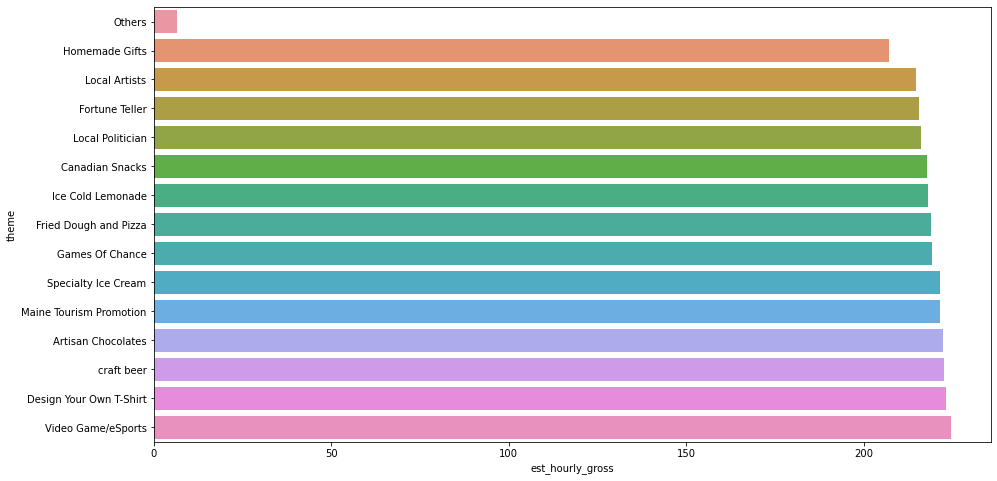

In [307]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y=grouped_CE.index, x="est_hourly_gross", orient='h', data=grouped_ee1)

* According to the plot, the theme for Video Game/eSports has the highest estimated revenue, but it does not higher than other themes a lot as the estimated energy usage does. Basically, the estimated revenues for different themes are pretty similar, but the estimated energy usage is not. Proportionally, the themes that will consume less energy would gain more revenue. As a result, we may want to promote those "middle class" themes for better profit.

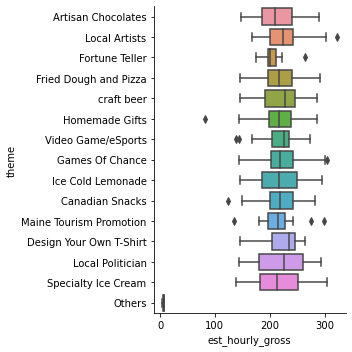

In [313]:
# To see which theme has the most/least potential
sns.catplot(x="est_hourly_gross", y="theme", kind="box",orient='h',data=vendor);

* I used Catplot to see the revenue range of each theme, according to the plot, I would not say that the Fortune Teller has big potential since the range of revenue is really limited, the median is relatively low as well; As for Local Politician, it got a great range of revenue. This could be the information for the prospective vendors so that they can choose the theme that they are good at as well as has the potential to gain profit. 